# Cracking the Code: Understanding What Makes Apps Popular on App Stores

If we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means that the number of users of our apps determines our revenue for any given app — the more users who see and engage with the ads, the better. Our goal for this project is to analyze data to help our developers understand what type of apps are likely to attract more users.

### Outline
[Data](#data) <br>
[Data Cleaning](#data-cleaning) <br>
[Data Analysis](#data-analysis) <br>
[Conclusions](#conclusions) <br>


## Data<a class="anchor" id="data"></a>
- ~10,000 Android apps from Google Play, collected in August 2018 [kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps)
- ~7,000 iOS apps from the App Store, collected in July 2017 [kaggle](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps)


In [1]:
from csv import reader

# Read in data from Google Play
with open('googleplaystore.csv',encoding="utf8") as f:
    read_file1 = reader(f, delimiter=",")
    google_data = list(read_file1)
    
# Read in data from Apple Store
with open('AppleStore.csv',encoding="utf8") as f:
    read_file2 = reader(f, delimiter=",")
    applestore_data = list(read_file2)

`explore_data()`: print rows in a readable way
- `dataset`: which will be a list of lists.
- `start` and `end`: which will both be integers and represent the starting and the ending indices of a slice from the dataset.
- `rows_and_columns`: print number of rows and column, expected to be a Boolean and has False as a default argument.

In [2]:
# print list of lists in a readable way
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row


In [3]:
# Print out a few examples in the two datasets
print('Google Play')
explore_data(google_data,0,3,True)
print('Apple Store')
explore_data(applestore_data,0,3,True)

Google Play
Number of rows: 10842
Number of columns: 13
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


Apple Store
Number of rows: 7198
Number of columns: 16
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']

## Data Cleaning <a class="anchor" id="data-cleaning"></a>
- Detect __inaccurate data__, and correct or remove it.
- Detect __duplicate data__, and remove the duplicates.
- Leave __English__ and __free__ apps (our target audience is English-speaking)

### [1] Remove missing Entry
A missing entry is mentioned on [kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion/66015). We will delete the missing entry.

In [4]:
## Search and delete the missing rows in the data - Google Play
# Find the missing rows
idx_missing = []
for index in range(1,len(google_data)):
    row = google_data[index]
    for item in row:
        if item == '':
            idx_missing.append(index-len(idx_missing))
            print(f'Missing entry {index}')
            
# Delete the missing rows
for i in idx_missing:
    print(f'Delete {google_data[i]}')
    del google_data[i]

## You can also replace it with None
# for row in google_data:
#     for index in range(0,len(row)):
#         if row[index] == '':
#             print('Replace empty with None')
#             row[index] = None

## You can try using different length, but the second entry won't be identified (no column shift) 
# len_googledata = len(google_data[0])
# for index in range(1,len(google_data)):
#     row = google_data[index]
#     if len(row) != len_googledata:
#         print('yes')
#         idx_missing.append(index-len(idx_missing))
# 

# # in this exmple we only delete one entry 10472 that shifted our data
# del google_data[10472]
# explore_data(google_data,0,3,True)


Missing entry 1554
Missing entry 10473
Delete ['Market Update Helper', 'LIBRARIES_AND_DEMO', '4.1', '20145', '11k', '1,000,000+', 'Free', '0', 'Everyone', 'Libraries & Demo', 'February 12, 2013', '', '1.5 and up']
Delete ['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


In [5]:
## [Optional] Delete the missing rows in the data - Apple Store (doesn't have missing entry)
# # Find the missing rows
# idx_missing2 = []
# for index in range(1,len(applestore_data)):
#     row = applestore_data[index]
#     for item in row:
#         if item == '':
#             idx_missing2.append(index-len(idx_missing2))

# # Delete the missing rows
# for i in idx_missing2:
#     del applestore_data[i]
    
# # Find different length
# len_applestoredata = len(applestore_data[0])
# for index in range(1,len(applestore_data)):
#     row = applestore_data[index]
#     if len(row) != len_applestoredata:
#         print('yes')
#         idx_missing2.append(index-len(idx_missing2))
        
# print(f'{len(idx_missing2)} rows deleted.\n')

# explore_data(applestore_data,0,3,True)

### [2] Remove duplicate entry
There are several duplicate entry in the Google Play Store data. Herem we first find out these entries and delete them.

In [6]:
# Find duplicate apps (no duplicate in Apple Store data)
duplicate_app = []
unique_app = []
for app in google_data[1:]:
    name = app[0]
    if name in unique_app:
        duplicate_app.append(name)
    else:
        unique_app.append(name)
        
print(f'Number of duplicate apps: {len(duplicate_app)}')

# print out an duplicate example
print('Example of duplicate apps:\n',duplicate_app[:5])

Number of duplicate apps: 1181
Example of duplicate apps:
 ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings']


Keep the row that has the highest number of reviews (as it can be collected more recent)

In [7]:
reviews_max = {}
for row in google_data[1:]:
    name = row[0]
    n_reviews = float(row[3])
    if (name in reviews_max) and (reviews_max[name] < n_reviews):
        reviews_max[name] = n_reviews
    elif (name not in reviews_max):
        reviews_max[name] = n_reviews
        
print(f'Remaining number of apps in Google Play: {len(reviews_max)}')
    

Remaining number of apps in Google Play: 9658


Create a new list that doesn't have duplicate data.

In [8]:
google_data_clean = []
already_in = []
for row in google_data[1:]:
    name = row[0]
    n_reviews = float(row[3])
    if (name not in already_in) and (reviews_max[name] == n_reviews):
        google_data_clean.append(row)
        already_in.append(name)

print(f'Expected number of apps in Google Play: {len(reviews_max)}')
print(f'Remaining number of apps in Google Play: {len(google_data_clean)}')

Expected number of apps in Google Play: 9658
Remaining number of apps in Google Play: 9658


### [3] Remove non-English apps
We want to focus on English apps in our study, so we will remove the non-English apps.
- Using `ord()` built-in function to get the corresponding number of each character
- The number corresponding to the characters we commonly use in an English text are all in the range 0 to 127, according to [ASCII](https://en.wikipedia.org/wiki/ASCII).
- Many English apps will be incorrectly labeled as False using the above criteria
- Remove the app only if its name has more than 3 characters falling outside the ASCII range

In [9]:
# Whether the string contains any non-English character
# return false if it's not English
def isEnglish(string_name):
    count = 0
    for character in string_name:
        if ord(character) > 127:
            count += 1
    if count > 3:
        return False
    else:
        return True

In [10]:
# Find out the non-English apps in Google Play Store
print('Google Play Store')
google_data_eng = []
for row in google_data_clean:
    name = row[0]
    if isEnglish(name):
        google_data_eng.append(row)

# Find out the non-English apps in Apple Store
print('\nApple Store')
applestore_data_eng = []
for row in applestore_data[1:]:
    name = row[1]
    if not isEnglish(name):
        print(name)
    else:
        applestore_data_eng.append(row)

Google Play Store

Apple Store
爱奇艺PPS -《欢乐颂2》电视剧热播
聚力视频HD-人民的名义,跨界歌王全网热播
优酷视频
网易新闻 - 精选好内容，算出你的兴趣
淘宝 - 随时随地，想淘就淘
搜狐视频HD-欢乐颂2 全网首播
阴阳师-全区互通现世集结
百度贴吧-全球最大兴趣交友社区
百度网盘
爱奇艺HD -《欢乐颂2》电视剧热播
乐视视频HD-白鹿原,欢乐颂,奔跑吧全网热播
万年历-值得信赖的日历黄历查询工具
新浪新闻-阅读最新时事热门头条资讯视频
喜马拉雅FM（听书社区）电台有声小说相声英语
央视影音-海量央视内容高清直播
腾讯视频HD-楚乔传,明日之子6月全网首播
手机百度 - 百度一下你就得到
百度视频HD-高清电视剧、电影在线观看神器
MOMO陌陌-开启视频社交,用直播分享生活
QQ 浏览器-搜新闻、选小说漫画、看视频
同花顺-炒股、股票
聚力视频-蓝光电视剧电影在线热播
快看漫画
乐视视频-白鹿原,欢乐颂,奔跑吧全网热播
酷我音乐HD-无损在线播放
随手记（专业版）-好用的记账理财工具
Dictionary ( قاموس عربي / انجليزي + ودجيت الترجمة)
滴滴出行
高德地图（精准专业的手机地图）
百度HD-极速安全浏览器
美丽说-潮流穿搭快人一步
百度地图-智能的手机导航，公交地铁出行必备
Majiang Mahjong（单机+川麻+二人+武汉+国标）
土豆视频HD—高清影视综艺视频播放器
360手机卫士-超安全的来电防骚扰助手
QQ浏览器HD-极速搜索浏览器
搜狗输入法-Sogou Keyboard
百度网盘 HD
大众点评-发现品质生活
讯飞输入法-智能语音输入和表情斗图神器
美柚 - 女生助手
爱奇艺 - 电视剧电影综艺娱乐视频播放器
搜狐视频-欢乐颂2 全网首播
百度地图HD
QQ同步助手-新机一键换机必备工具
QQ音乐-来这里“发现・音乐”
腾讯新闻-头条新闻热点资讯掌上阅读软件
土豆（短视频分享平台）
风行视频+ HD - 电影电视剧体育视频播放器
仙劍奇俠傳5 - 劍傲丹楓
YY- 小全民手机直播交友软件
腾讯视频-欢乐颂2全网首播
中华万年历-2亿用户首选的日历软件
央视影音HD-海量央视内容高清直播
蘑菇街-网红直播搭配的购物特卖平台
Keep - 移动健身教练 自由运动场

In [11]:
print(f'Remaining number of apps in Google Play Store: {len(google_data_eng)}')
print(f'Remaining number of apps in Apple Store: {len(applestore_data_eng)}')

Remaining number of apps in Google Play Store: 9613
Remaining number of apps in Apple Store: 6183


### [4] Isolating the free apps
Our target is free apps, so we will isolate the free apps from the paid apps.


In [12]:
# Index of Google Store Apps Price = 7
google_data_final = []
for app in google_data_eng:
    price = app[7]
    if price == '0':
        google_data_final.append(app)
    
# Index of Apple Store Apps Price = 4
applestore_data_final = []
for app in applestore_data_eng:
    price = float(app[4])
    if price == 0:
        applestore_data_final.append(app)

print(f'Remaining number of apps in Google Play Store: {len(google_data_final)}')
print(f'Remaining number of apps in Apple Store: {len(applestore_data_final)}')

Remaining number of apps in Google Play Store: 8863
Remaining number of apps in Apple Store: 3222


## Data Analysis<a class="anchor" id="data-analysis"></a>

### [1] Most Common Apps by Genre
Find app profiles that are successful on both markets by getting a sense of what are the most common genres for each market. We ill build frequency tables to achieve this purpose. 

Columns that we could use:
`Category` and `Genres` columns of the Google Play data and
`prime_genre` columns of the Apple Store data 

In [13]:
print('Google Play Store: ',google_data[0][1],',', google_data[0][9])
print('Apple Store: ',applestore_data[0][11])

Google Play Store:  Category , Genres
Apple Store:  prime_genre


Two function that we can use to analyze the frequency tables:
1. One function to generate frequency tables that show percentages
2. Another function we can use to display the percentages in a descending order using built-in function `sorted()`

`freq_table()`
- `dataset`: a list of lists
- `index`: integer
- the function will return the frequency table as a dictionary for any column we choose
- the frequencies are expressed as percentages

In [14]:
# return the frequency table as a dictionary for any column we choose
def freq_table(dataset, index):
    freq_dic = {}
    for row in dataset:
        element = row[index]
        if element in freq_dic:
            freq_dic[element] += 1
        else:
            freq_dic[element] = 1
            
    # transform to percentage
    data_size = len(dataset)
    for item in freq_dic:
        freq_dic[item] /= data_size
        freq_dic[item] *= 100
        
    return freq_dic

Helper function `display_table()`
- `dataset`: a list of lists
- `index`: integer
- transforms the frequency table into a list of tuples, then sorts the list in a descending order


In [15]:
# transforms the frequency table into a list of tuples, then sorts the list in a descending order 
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

### Apple Store
First, let's look at the frequency table of genre from apple store.

In [16]:
print('Apple Store - Genre Frequency:')
display_table(applestore_data_final,11)

Apple Store - Genre Frequency:
Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


Most common genre: __Games__ <br>
Next most common genre: __Entertainment__
- The percentage of games is more than 50%
- The other genres are much less frequent compared with games
- Most of the __free English__  apps are designed for __entertainment purposes__ (e.g. Games, Entertainment, Phto & Video).

However, the decision can't be made solely on thie frequency table, this doesn't imply that this genre generally has a large number of users.



### Google Play Store

In [17]:
print('Google Play Store - Category Frequency:')
display_table(google_data_final,1)

Google Play Store - Category Frequency:
FAMILY : 18.910075595170937
GAME : 9.725826469592688
TOOLS : 8.462146000225657
BUSINESS : 4.592124562789123
LIFESTYLE : 3.9038700214374367
PRODUCTIVITY : 3.8925871601038025
FINANCE : 3.7007785174320205
MEDICAL : 3.5315355974275078
SPORTS : 3.396141261423897
PERSONALIZATION : 3.317161232088458
COMMUNICATION : 3.2381812027530184
HEALTH_AND_FITNESS : 3.0802211440821394
PHOTOGRAPHY : 2.944826808078529
NEWS_AND_MAGAZINES : 2.798149610741284
SOCIAL : 2.6627552747376737
TRAVEL_AND_LOCAL : 2.335552296062281
SHOPPING : 2.245289405393208
BOOKS_AND_REFERENCE : 2.1437436533904997
DATING : 1.8616721200496444
VIDEO_PLAYERS : 1.7939749520478394
MAPS_AND_NAVIGATION : 1.399074805370642
FOOD_AND_DRINK : 1.241114746699763
EDUCATION : 1.1621347173643235
ENTERTAINMENT : 0.9590432133589079
LIBRARIES_AND_DEMO : 0.9251946293580051
AUTO_AND_VEHICLES : 0.9251946293580051
HOUSE_AND_HOME : 0.8236488773552973
WEATHER : 0.8010831546880289
EVENTS : 0.7108202640189552
PARENTING

In [18]:
print('Google Play Store - Genres Frequency:')
display_table(google_data_final,9)

Google Play Store - Genres Frequency:
Tools : 8.450863138892023
Entertainment : 6.070179397495204
Education : 5.348076272142616
Business : 4.592124562789123
Productivity : 3.8925871601038025
Lifestyle : 3.8925871601038025
Finance : 3.7007785174320205
Medical : 3.5315355974275078
Sports : 3.463838429425702
Personalization : 3.317161232088458
Communication : 3.2381812027530184
Action : 3.102786866749408
Health & Fitness : 3.0802211440821394
Photography : 2.944826808078529
News & Magazines : 2.798149610741284
Social : 2.6627552747376737
Travel & Local : 2.324269434728647
Shopping : 2.245289405393208
Books & Reference : 2.1437436533904997
Simulation : 2.042197901387792
Dating : 1.8616721200496444
Arcade : 1.8503892587160102
Video Players & Editors : 1.771409229380571
Casual : 1.7601263680469368
Maps & Navigation : 1.399074805370642
Food & Drink : 1.241114746699763
Puzzle : 1.128286133363421
Racing : 0.9928917973598104
Role Playing : 0.9364774906916393
Libraries & Demo : 0.9251946293580051


Most common category: __Family__, __Game__, __Tools__ <br>
Most common genres: __Tools__, __Entertainment__, __Education__ <br>

- The frequency of the family category is twice of the second common genres.
- The frequency distribution of genres is more homogeneous, they all have similar percentage
- If we search the family category on the Google Play Store, we'll find that most of the apps in the family category are children's games.

Compared with the App Store, Google Play Store's most common categories include apps for practical purposes (e.g. family, tools, business, lifestyle). But the entertainment apps still have a big percentage among all the apps.

Based on the frequency table, the __entertainment apps__ are the most common apps in the two stores. However, it doesn't mean that most of the users are using these apps.

### [2] Most Popular Apps

One way to find out what genres are the most popular (or have the most users) is to calculate the average number of installs for each app genre.
- Google Play Store: `Installs` column
- Apple Store: no info about the number of installs, we will use `rating_count_tot` the total number of user ratings instead.

We will approach it by first calculating the average number of user ratings per app genre

### Apple Store

In [19]:
# calculating the average number of user ratings per app genre
apple_genre_freq_dic = freq_table(applestore_data_final,11)
apple_genre_rating = {}

for genre in apple_genre_freq_dic:    
    
    total = 0 # store the sum of user rating
    len_genre = 0 # store the number of apps specific to each genre
    
    for app in applestore_data_final:
        genre_app = app[11]
        if genre_app == genre:
            total += float(app[5])
            len_genre += 1
            
    avg = total / len_genre
    apple_genre_rating[genre] = avg
    print(f'{genre}: {avg}')
    

Social Networking: 71548.34905660378
Photo & Video: 28441.54375
Games: 22788.6696905016
Music: 57326.530303030304
Reference: 74942.11111111111
Health & Fitness: 23298.015384615384
Weather: 52279.892857142855
Utilities: 18684.456790123455
Travel: 28243.8
Shopping: 26919.690476190477
News: 21248.023255813954
Navigation: 86090.33333333333
Lifestyle: 16485.764705882353
Entertainment: 14029.830708661417
Food & Drink: 33333.92307692308
Sports: 23008.898550724636
Book: 39758.5
Finance: 31467.944444444445
Education: 7003.983050847458
Productivity: 21028.410714285714
Business: 7491.117647058823
Catalogs: 4004.0
Medical: 612.0


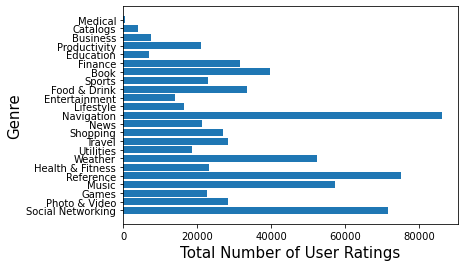

In [20]:
# Plot out the total number of user ratings versus genre
import matplotlib.pyplot as plt

names = list(apple_genre_rating.keys())
values = list(apple_genre_rating.values())

plt.barh(range(len(apple_genre_rating)), values, tick_label=names)
plt.xlabel('Total Number of User Ratings', fontsize=15)
plt.ylabel('Genre', fontsize=15)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

According to the plot above, __Navigation__ has the greatest number of user ratings, __Reference__ and __Social Networking__ come next. 

Notice that _Waze_ and _Google Maps_ together have close to 0.5 million user reviews, which heavily influenced the result. 

In [21]:
# print(applestore_data[0])
for app in applestore_data_final:
    if app[11] == 'Navigation':
        print(app[1],':',app[5])

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


Similar for the Reference category, the number of user ratings are dominanted by `Bible` and `Dictionary.com`.

In [22]:
# print(applestore_data[0])
for app in applestore_data_final:
    if app[11] == 'Reference':
        print(app[1],':',app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


Apple Store seems to have been saturated by apps of entertainment types. It'd be worth it to develop apps that has practical use. 

### Google Play Store
We analyze the user preference by building frequency table for the number of installs:

In [23]:
display_table(google_data_final,5)

1,000,000+ : 15.717025837752455
100,000+ : 11.55365000564143
10,000,000+ : 10.549475346947986
10,000+ : 10.199706645605326
1,000+ : 8.394448832223853
100+ : 6.916393997517771
5,000,000+ : 6.826131106848697
500,000+ : 5.562450637481666
50,000+ : 4.772650344127271
5,000+ : 4.513144533453684
10+ : 3.542818458761142
500+ : 3.2494640640866526
50,000,000+ : 2.3017037120613786
100,000,000+ : 2.1324607920568655
50+ : 1.9180864267178157
5+ : 0.7898002933543946
1+ : 0.5077287600135394
500,000,000+ : 0.270788672007221
1,000,000,000+ : 0.2256572266726842
0+ : 0.045131445334536835
0 : 0.011282861333634209


The problem about the data it's not precise. We don't know if 10,000+ represents 90,000 or 10,001. But the data can still give us a general idea about the user preference. We will assum that 10,000+ represents 10,000. <br>
We have to replace the `+` and convert the number to `float`. 
This can be done by using `str.replace(old, new)`

In [24]:
# Build frequency table between installs and category
google_cato_freq_dic = freq_table(google_data_final,1)
google_cato_install = {}

for category in google_cato_freq_dic:    
    
    total = 0 # store the sum of user installs
    len_category = 0 # store the number of apps specific to each genre
    
    for app in google_data_final:
        category_app = app[1]
        if category_app == category:
            val = app[5].replace('+','') 
            val = val.replace(',','')
            total += float(val)
            len_category += 1
            
    avg = total / len_category
    google_cato_install[category] = avg
    print(f'{category}: {avg}')

ART_AND_DESIGN: 1986335.0877192982
AUTO_AND_VEHICLES: 647317.8170731707
BEAUTY: 513151.88679245283
BOOKS_AND_REFERENCE: 8767811.894736841
BUSINESS: 1712290.1474201474
COMICS: 817657.2727272727
COMMUNICATION: 38456119.167247385
DATING: 854028.8303030303
EDUCATION: 1833495.145631068
ENTERTAINMENT: 11640705.88235294
EVENTS: 253542.22222222222
FINANCE: 1387692.475609756
FOOD_AND_DRINK: 1924897.7363636363
HEALTH_AND_FITNESS: 4188821.9853479853
HOUSE_AND_HOME: 1331540.5616438356
LIBRARIES_AND_DEMO: 634095.243902439
LIFESTYLE: 1437816.2687861272
GAME: 15588015.603248259
FAMILY: 3695641.8198090694
MEDICAL: 120550.61980830671
SOCIAL: 23253652.127118643
SHOPPING: 7036877.311557789
PHOTOGRAPHY: 17840110.40229885
SPORTS: 3638640.1428571427
TRAVEL_AND_LOCAL: 13984077.710144928
TOOLS: 10801391.298666667
PERSONALIZATION: 5201482.6122448975
PRODUCTIVITY: 16787331.344927534
PARENTING: 542603.6206896552
WEATHER: 5074486.197183099
VIDEO_PLAYERS: 24727872.452830188
NEWS_AND_MAGAZINES: 9549178.467741935
MA

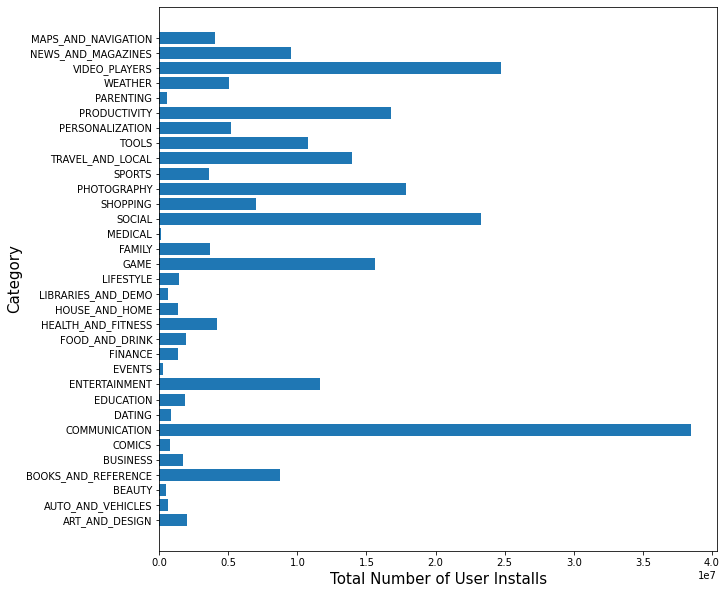

In [25]:
# Plot out the total number of user installs versus category
names_g = list(google_cato_install.keys())
values_g = list(google_cato_install.values())

plt.barh(range(len(google_cato_install)), values_g, tick_label=names_g)
plt.xlabel('Total Number of User Installs', fontsize=15)
plt.ylabel('Category', fontsize=15)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

According to the plot above, __Communication__ has the greatest number of user installs, __Video Players__ and __Social__ come next. It's likely that more users will be using __social networking apps__. <br>

In [26]:
# Take a look into the apps in the communication category
for app in google_data_final:
    if app[1] == 'COMMUNICATION':
        print(app[0],':',app[5])

WhatsApp Messenger : 1,000,000,000+
Messenger for SMS : 10,000,000+
My Tele2 : 5,000,000+
imo beta free calls and text : 100,000,000+
Contacts : 50,000,000+
Call Free – Free Call : 5,000,000+
Web Browser & Explorer : 5,000,000+
Browser 4G : 10,000,000+
MegaFon Dashboard : 10,000,000+
ZenUI Dialer & Contacts : 10,000,000+
Cricket Visual Voicemail : 10,000,000+
TracFone My Account : 1,000,000+
Xperia Link™ : 10,000,000+
TouchPal Keyboard - Fun Emoji & Android Keyboard : 10,000,000+
Skype Lite - Free Video Call & Chat : 5,000,000+
My magenta : 1,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Seznam.cz : 1,000,000+
Antillean Gold Telegram (original version) : 100,000+
AT&T Visual Voicemail : 10,000,000+
GMX Mail : 10,000,000+
Omlet Chat : 10,000,000+
My Vodacom SA : 5,000,000+
Microsoft Edge : 5,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Calls & Text by Mo+ : 5,000,000+
free 

In [27]:
# Take a look into the apps in the video players category
for app in google_data_final:
    if app[1] == 'VIDEO_PLAYERS':
        print(app[0],':',app[5])

YouTube : 1,000,000,000+
All Video Downloader 2018 : 1,000,000+
Video Downloader : 10,000,000+
HD Video Player : 1,000,000+
Iqiyi (for tablet) : 1,000,000+
Video Player All Format : 10,000,000+
Motorola Gallery : 100,000,000+
Free TV series : 100,000+
Video Player All Format for Android : 500,000+
VLC for Android : 100,000,000+
Code : 10,000,000+
Vote for : 50,000,000+
XX HD Video downloader-Free Video Downloader : 1,000,000+
OBJECTIVE : 1,000,000+
Music - Mp3 Player : 10,000,000+
HD Movie Video Player : 1,000,000+
YouCut - Video Editor & Video Maker, No Watermark : 5,000,000+
Video Editor,Crop Video,Movie Video,Music,Effects : 1,000,000+
YouTube Studio : 10,000,000+
video player for android : 10,000,000+
Vigo Video : 50,000,000+
Google Play Movies & TV : 1,000,000,000+
HTC Service － DLNA : 10,000,000+
VPlayer : 1,000,000+
MiniMovie - Free Video and Slideshow Editor : 50,000,000+
Samsung Video Library : 50,000,000+
OnePlus Gallery : 1,000,000+
LIKE – Magic Video Maker & Community : 50,

According to the installs on Google Play, many users are using communication apps. At the same time, people also use apps that provides videos and video editing. <br>
Let's also look at the genre in the Google Play data.

In [28]:
display_table(google_data_final,9)

Tools : 8.450863138892023
Entertainment : 6.070179397495204
Education : 5.348076272142616
Business : 4.592124562789123
Productivity : 3.8925871601038025
Lifestyle : 3.8925871601038025
Finance : 3.7007785174320205
Medical : 3.5315355974275078
Sports : 3.463838429425702
Personalization : 3.317161232088458
Communication : 3.2381812027530184
Action : 3.102786866749408
Health & Fitness : 3.0802211440821394
Photography : 2.944826808078529
News & Magazines : 2.798149610741284
Social : 2.6627552747376737
Travel & Local : 2.324269434728647
Shopping : 2.245289405393208
Books & Reference : 2.1437436533904997
Simulation : 2.042197901387792
Dating : 1.8616721200496444
Arcade : 1.8503892587160102
Video Players & Editors : 1.771409229380571
Casual : 1.7601263680469368
Maps & Navigation : 1.399074805370642
Food & Drink : 1.241114746699763
Puzzle : 1.128286133363421
Racing : 0.9928917973598104
Role Playing : 0.9364774906916393
Libraries & Demo : 0.9251946293580051
Auto & Vehicles : 0.9251946293580051
S

In [29]:
# Build frequency table between installs and genre
google_genre_freq_dic = freq_table(google_data_final,1)
google_genre_install = {}

for genre in google_genre_freq_dic:    
    
    total = 0 # store the sum of user installs
    len_genre = 0 # store the number of apps specific to each genre
    
    for app in google_data_final:
        genre_app = app[1]
        if genre_app == genre:
            val = app[5].replace('+','') 
            val = val.replace(',','')
            total += float(val)
            len_genre += 1
            
    avg = total / len_genre
    google_genre_install[genre] = avg
    print(f'{genre}: {avg}')

ART_AND_DESIGN: 1986335.0877192982
AUTO_AND_VEHICLES: 647317.8170731707
BEAUTY: 513151.88679245283
BOOKS_AND_REFERENCE: 8767811.894736841
BUSINESS: 1712290.1474201474
COMICS: 817657.2727272727
COMMUNICATION: 38456119.167247385
DATING: 854028.8303030303
EDUCATION: 1833495.145631068
ENTERTAINMENT: 11640705.88235294
EVENTS: 253542.22222222222
FINANCE: 1387692.475609756
FOOD_AND_DRINK: 1924897.7363636363
HEALTH_AND_FITNESS: 4188821.9853479853
HOUSE_AND_HOME: 1331540.5616438356
LIBRARIES_AND_DEMO: 634095.243902439
LIFESTYLE: 1437816.2687861272
GAME: 15588015.603248259
FAMILY: 3695641.8198090694
MEDICAL: 120550.61980830671
SOCIAL: 23253652.127118643
SHOPPING: 7036877.311557789
PHOTOGRAPHY: 17840110.40229885
SPORTS: 3638640.1428571427
TRAVEL_AND_LOCAL: 13984077.710144928
TOOLS: 10801391.298666667
PERSONALIZATION: 5201482.6122448975
PRODUCTIVITY: 16787331.344927534
PARENTING: 542603.6206896552
WEATHER: 5074486.197183099
VIDEO_PLAYERS: 24727872.452830188
NEWS_AND_MAGAZINES: 9549178.467741935
MA

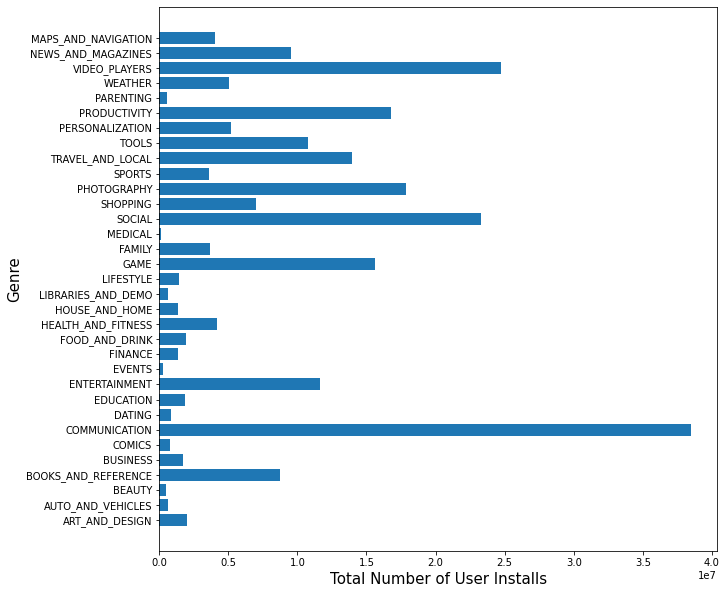

In [30]:
# Plot out the total number of user installs versus genres
names_g2 = list(google_genre_install.keys())
values_g2 = list(google_genre_install.values())

plt.barh(range(len(google_genre_install)), values_g2, tick_label=names_g2)
plt.xlabel('Total Number of User Installs', fontsize=15)
plt.ylabel('Genre', fontsize=15)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

The genre seems to be a general version of the category. Again, __Communication__, __VideoPlayers__, and __Social__ have the most downloads.

## Conclusions<a class="anchor" id="conclusions"></a>
In this project: 
- We aim to launch an free app that would attract users.
- We collected relevant data from Apple Store and Google Play Store.
- We cleaned the data to prepare it for analysis.
- We analyzed the cleaned data. 
<br><br>
Based on the genres of the apps on Googl Play Store and Apple Store, most of the apps are entertainment. However, the installs and user rating numbers have shown that users tend to download practical apps more. An app that can help people learn about new things (e.g. news, trendings, designs, ideas) through short videos and provide a communication platform might attract more people. 